In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import itemgetter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns

In [2]:
df_train_prepared = pd.read_pickle('df_train_prepared')
#df_train_pred = pd.read_pickle('df_train_prediction')

train_no_click =  df_train_prepared[df_train_prepared['click'] == 0]
train_no_click = train_no_click.rename(columns = {'click':'no_click'})

train_click =  df_train_prepared[df_train_prepared['click'] == 1]

In [3]:
def features_CTR (feature): 
    no_click = train_no_click.groupby([feature,'no_click']).size().to_frame('no_click_counts')
    no_click = no_click.reset_index()
    no_click = no_click.drop(['no_click'], axis =1)

    clicked = train_click.groupby([feature,'click']).size().to_frame('click_counts')
    clicked = clicked.reset_index()
    clicked = clicked.drop(['click'], axis =1)

    df_join = pd.merge(no_click , clicked, on = feature)
    df_join['ratio'] = df_join['click_counts']/df_join['no_click_counts']
    return df_join

In [4]:
features = list(df_train_prepared)
features

['click',
 'weekday',
 'hour',
 'region',
 'city',
 'adexchange',
 'slotwidth',
 'slotheight',
 'slotprice',
 'bidprice',
 'payprice',
 'advertiser',
 'useragent_encoded',
 'IP_encoded',
 'url_encoded',
 'domain_encoded',
 'slotid_encoded',
 'slotvisibility_encoded',
 'slotformat_encoded',
 'creative_encoded',
 'keypage_encoded',
 'usertag_encoded']

In [5]:
weekday = features_CTR('weekday').sort_values('ratio', ascending = False)
print('weekday:')
print(len(weekday))
print(weekday['ratio'].min())
print(weekday['ratio'].max())
print(weekday['ratio'].mean())
print()

hour = features_CTR('hour').sort_values('ratio', ascending = False)
print('hour:')
print(len(hour))
print(hour['ratio'].min())
print(hour['ratio'].max())
print(hour['ratio'].mean())
print()

region = features_CTR('region').sort_values('ratio', ascending = False)
print('region:')
print(len(region))
print(region['ratio'].min())
print(region['ratio'].max())
print(region['ratio'].mean())
print()

city =features_CTR('city').sort_values('ratio', ascending = False)
print('city:')
print(len(city))
print(region['ratio'].min())
print(city['ratio'].max())
print(city['ratio'].mean())
print()

adexchange =features_CTR('adexchange').sort_values('ratio', ascending = False)
print('adexchange:')
print(len(adexchange))
print(adexchange['ratio'].min())
print(adexchange['ratio'].max())
print(adexchange['ratio'].mean())
print()

slotwidth = features_CTR('slotwidth').sort_values('ratio', ascending = False)
print('slotwidth:')
print(len(slotwidth))
print(slotwidth['ratio'].min())
print(slotwidth['ratio'].max())
print(slotwidth['ratio'].mean())
print()

slotheight = features_CTR('slotheight').sort_values('ratio', ascending = False)
print('slotheight:')
print(len(slotheight))
print(slotheight['ratio'].min())
print(slotheight['ratio'].max())
print(weekday['ratio'].mean())
print()

slotprice = features_CTR('slotprice').sort_values('ratio', ascending = False)
print('slotprice:')
print(len(slotprice))
print(slotprice['ratio'].min())
print(slotprice['ratio'].max())
print(slotprice['ratio'].mean())
print()

advertiser = features_CTR('advertiser').sort_values('ratio', ascending = False)
print('advertiser:')
print(len(advertiser))
print(advertiser['ratio'].min())
print(advertiser['ratio'].max())
print(advertiser['ratio'].mean())
print()

useragent =features_CTR('useragent_encoded').sort_values('ratio', ascending = False)
print('useragent:')
print(len(useragent))
print(useragent['ratio'].min())
print(useragent['ratio'].max())
print(useragent['ratio'].mean())
print()

IP = features_CTR('IP_encoded').sort_values('ratio', ascending = False)
IP = IP[IP['no_click_counts'] > 10]
print('IP:')
print(len(IP))
print(IP['ratio'].min()) 
print(IP['ratio'].max()) 
print(IP['ratio'].mean())
print()

url = features_CTR('url_encoded').sort_values('ratio', ascending = False)
url = url[url['no_click_counts'] > 10]
print('url:')
print(len(url))
print(url['ratio'].min()) 
print(url['ratio'].max())
print(url['ratio'].mean())
print()

domain = features_CTR('domain_encoded').sort_values('ratio', ascending = False)
domain = domain[domain['no_click_counts'] > 10]
print('domain:')
print(len(domain))
print(domain['ratio'].min())
print(domain['ratio'].max())
print(domain['ratio'].mean())
print()

slotid =features_CTR('slotid_encoded').sort_values('ratio', ascending = False)
print('slotid:')
print(len(slotid))
print(slotprice['ratio'].min())
print(slotprice['ratio'].max())
print(slotid['ratio'].mean())
print()


slotvisibility = features_CTR('slotvisibility_encoded').sort_values('ratio', ascending = False)
print('slotvisibility:')
print(len(slotvisibility))
print(slotvisibility['ratio'].min())
print(slotvisibility['ratio'].max())
print(slotvisibility['ratio'].mean())
print()

slotformat = features_CTR('slotformat_encoded').sort_values('ratio', ascending = False)
print('slotformat:')
print(len(slotformat))
print(slotformat['ratio'].min())
print(slotformat['ratio'].max())
print(slotformat['ratio'].mean())
print()


creative =features_CTR('creative_encoded').sort_values('ratio', ascending = False)
print('creative:')
print(len(creative))
print(creative['ratio'].min())
print(creative['ratio'].max())
print(creative['ratio'].mean())
print()

keypage = features_CTR('keypage_encoded').sort_values('ratio', ascending = False)
print('keypage:')
print(len(keypage))
print(keypage['ratio'].min())
print(keypage['ratio'].max())
print(keypage['ratio'].mean())
print()

usertag = features_CTR('usertag_encoded').sort_values('ratio', ascending = False)
usertag = usertag[usertag['no_click_counts'] > 10]
print('usertag:')
print(len(usertag))
print(usertag['ratio'].min())
print(usertag['ratio'].max())
print(usertag['ratio'].mean())

weekday:
7
0.0005694155966767372
0.0009657203057889192
0.0007465898178900671

hour:
24
0.0002604053643505056
0.0010184293865706832
0.0006937929444124118

region:
34
0.0005165035171429977
0.002372479240806643
0.000866700338533789

city:
297
0.0005165035171429977
0.006963788300835654
0.0008971759577313525

adexchange:
5
0.0004752554498042698
0.00437394178827703
0.0013726208445518173

slotwidth:
18
0.000149655791679138
0.014084507042253521
0.0015192179710619912

slotheight:
11
0.00018287006250831226
0.014084507042253521
0.0007465898178900671

slotprice:
112
0.00016466326362588507
0.09523809523809523
0.01030365979189887

advertiser:
9
0.00032178403053206617
0.00437394178827703
0.0010188737709879783

useragent:
16
0.0003566333808844508
0.02631578947368421
0.003988507590551258

IP:
400
0.00047393364928909954
0.13636363636363635
0.03842094272025772

url:
566
4.839099927413501e-05
0.10526315789473684
0.018822931462441832

domain:
409
5.278158978148422e-05
0.07692307692307693
0.0073855635814205

In [6]:
#for f in features: 
#plot_features(weekday)
def plot_features(feature, f):
    plt.figure(figsize=(15, 10))
    x = feature[f]
    y = feature['ratio']
    plt.subplot(222)
    sns.regplot(x, y, data = feature, color="red")

    plt.show()

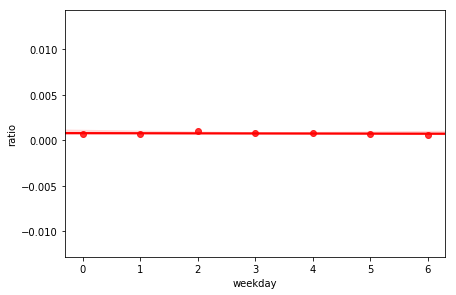

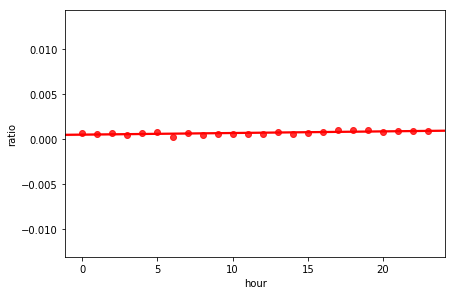

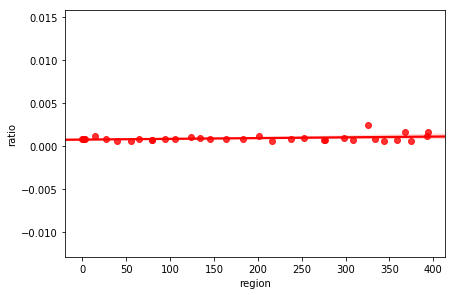

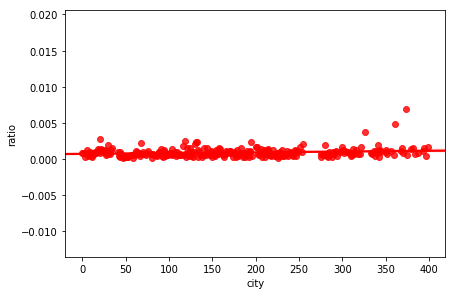

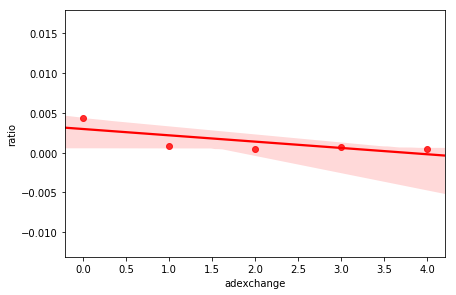

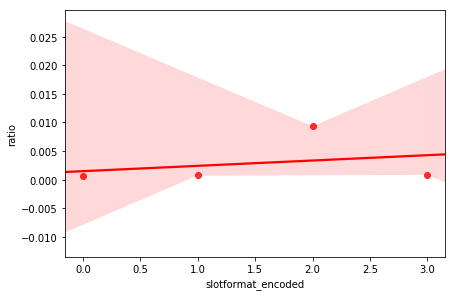

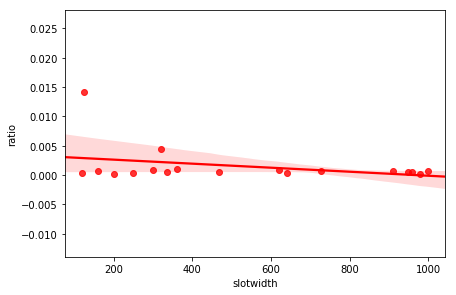

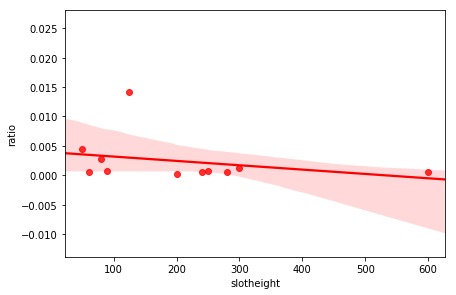

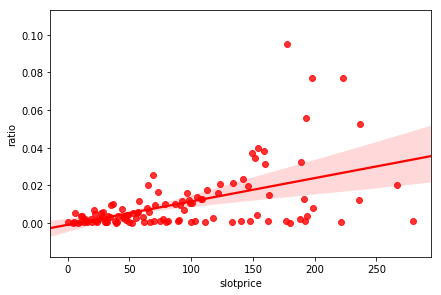

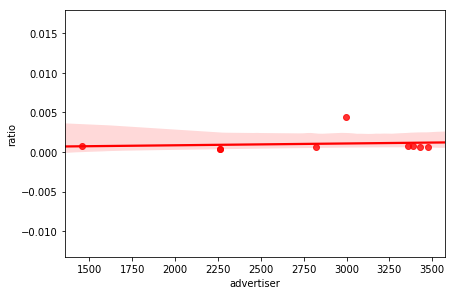

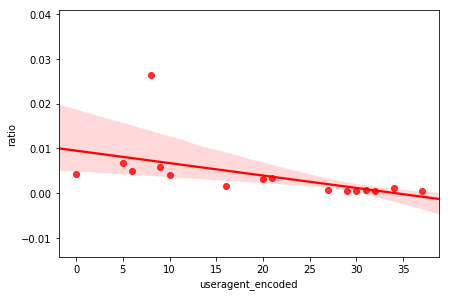

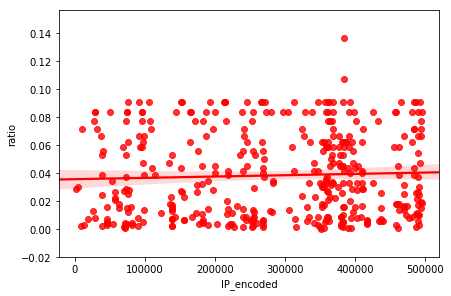

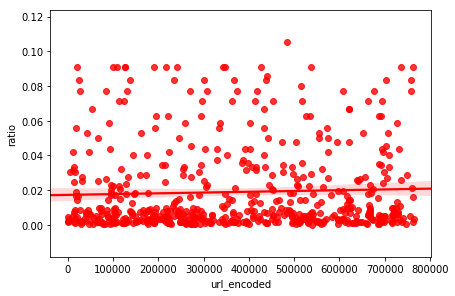

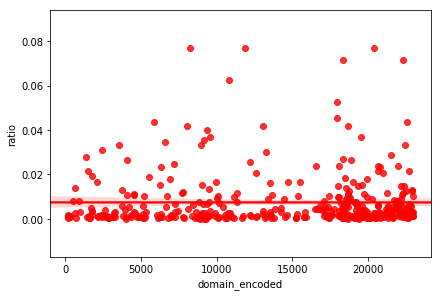

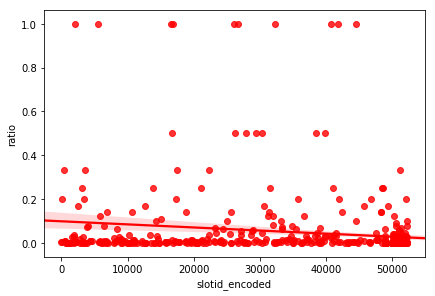

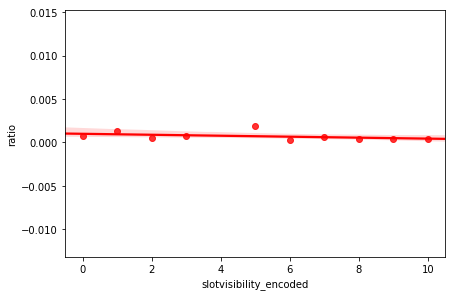

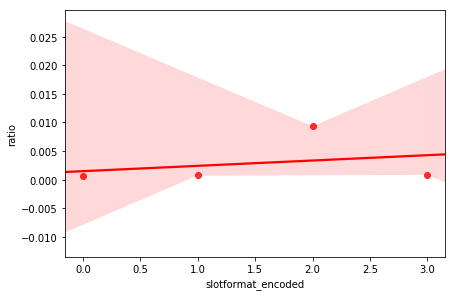

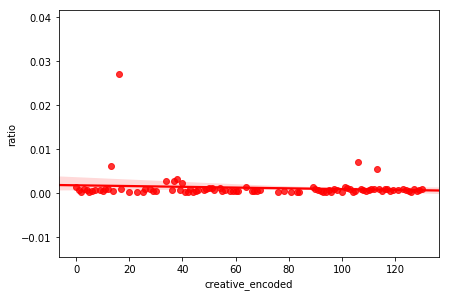

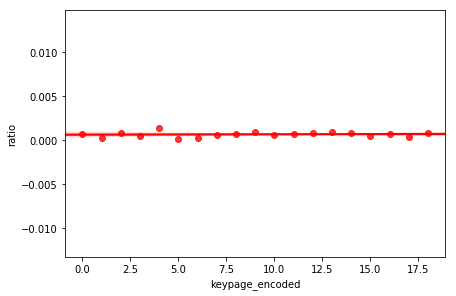

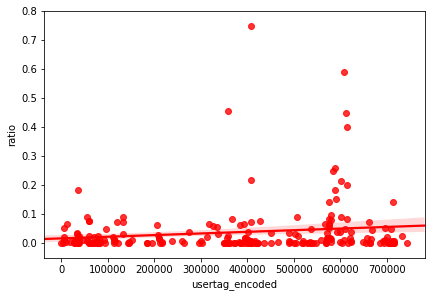

In [7]:

plot_features(weekday, 'weekday')

plot_features(hour, 'hour')

plot_features(region, 'region')

plot_features(city, 'city')

plot_features(adexchange, 'adexchange')

plot_features(slotformat, 'slotformat_encoded')

plot_features(slotwidth, 'slotwidth')

plot_features(slotheight, 'slotheight')

plot_features(slotprice, 'slotprice')

plot_features(advertiser, 'advertiser')

plot_features(useragent, 'useragent_encoded')

plot_features(IP, 'IP_encoded')

plot_features(url, 'url_encoded')

plot_features(domain, 'domain_encoded')

plot_features(slotid, 'slotid_encoded')

plot_features(slotvisibility, 'slotvisibility_encoded')

plot_features(slotformat, 'slotformat_encoded')

plot_features(creative, 'creative_encoded')

plot_features(keypage, 'keypage_encoded')

plot_features(usertag, 'usertag_encoded')